## Classification with MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
mnist['data'], mnist['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

Lets, just check if the data and target are matching

(-0.5, 27.5, 27.5, -0.5)

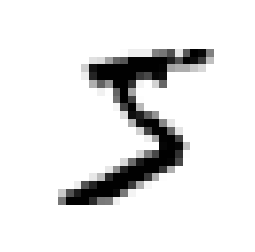

In [4]:
plt.imshow(mnist['data'][0].reshape(28,28), 
          cmap='binary')
plt.axis('off')          

In [5]:
mnist.target[0]

5

It looks good.

In [6]:
mnist.target.shape

(70000,)

In [76]:
X_train, X_test = mnist['data'][:60000], mnist['data'][60000:]
y_train, y_test = mnist['target'][:60000], mnist['target'][60000:]

X_train.shape

(60000, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_c = KNeighborsClassifier()
knn_c.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn_c.predict(X_train[0:10])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [11]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [12]:
y_predict = knn_c.predict(X_train[:100])
sum(y_predict == y_train[:100])/len(y_train[:100])

0.99

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

forest_mdl = RandomForestClassifier()
forest_crs_score = cross_val_score(forest_mdl, X_train, y_train, cv=5)
forest_crs_score

/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-package

array([0.94394002, 0.93909348, 0.9405    , 0.93973493, 0.94864955])

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_mdl = SGDClassifier(random_state=42)
sgd_crs_score = cross_val_score(sgd_mdl, X_train, y_train, cv=5)
sgd_crs_score

array([0.8849646 , 0.87627062, 0.87341667, 0.86388264, 0.87062354])

In [15]:
from sklearn.model_selection import cross_val_predict

sgd_crs_predict = cross_val_predict(sgd_mdl, X_train, y_train, cv=5)
sgd_crs_predict

array([3, 0, 4, ..., 5, 6, 8], dtype=int8)

In [16]:
from sklearn.metrics import confusion_matrix

cnf_mat = confusion_matrix(y_train, sgd_crs_predict)
cnf_mat

array([[5704,    1,   26,   16,   10,   49,   32,    5,   67,   13],
       [   2, 6439,   52,   34,   12,   41,    5,   19,  124,   14],
       [  91,   65, 5049,  201,   58,   71,   82,   75,  253,   13],
       [  76,   18,  197, 5196,    9,  293,   16,   62,  168,   96],
       [  38,   27,   76,   23, 5078,   49,   56,   32,  134,  329],
       [ 131,   20,   56,  251,   54, 4492,   89,   20,  224,   84],
       [ 105,   15,  162,   19,   54,  138, 5358,    4,   60,    3],
       [  48,   22,   70,   66,   71,   76,    5, 5528,   65,  314],
       [  63,   92,   97,  211,   36,  453,   35,   22, 4714,  128],
       [  55,   20,   37,  144,  215,  177,    4,  246,  179, 4872]])

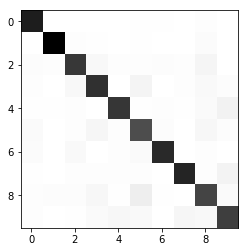

In [17]:
plt.imshow(cnf_mat,
          cmap='binary')

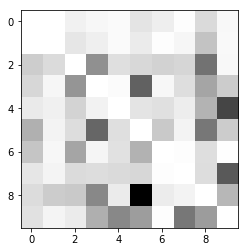

In [18]:
row_sums = cnf_mat.sum(axis=1, keepdims=True)
norm_cnf_mat = cnf_mat/row_sums
np.fill_diagonal(norm_cnf_mat, 0)

plt.imshow(norm_cnf_mat,
          cmap='binary')

In [19]:
forest_crs_predict = cross_val_predict(forest_mdl, X_train, y_train, cv=5)
forest_crs_predict

/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-package

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

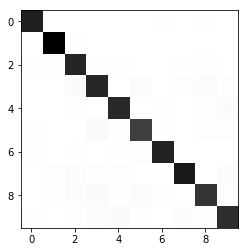

In [20]:
cnf_mat = confusion_matrix(y_train, forest_crs_predict)
plt.imshow(cnf_mat,
          cmap='binary')

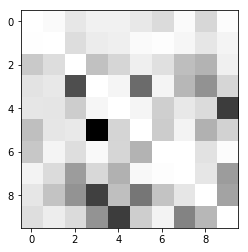

In [21]:
row_sums = cnf_mat.sum(axis=1, keepdims=True)
norm_cnf_mat = cnf_mat/row_sums
np.fill_diagonal(norm_cnf_mat, 0)

plt.imshow(norm_cnf_mat,
          cmap='binary')

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

def print_eval_score(true_y, pred_y):
    pre = precision_score(true_y, pred_y, average='macro')
    rec = recall_score(true_y, pred_y, average='macro')
    f1 = f1_score(true_y, pred_y, average='macro')    
    print('Precision: {}, Recall: {}, F1: {}'.format(pre, rec, f1))

In [23]:
print_eval_score(y_train, forest_crs_predict)

Precision: 0.9428803068656624, Recall: 0.9427004940213572, F1: 0.9427211293019836


In [24]:
print_eval_score(y_train, sgd_crs_predict)

Precision: 0.8729147757777775, Recall: 0.8723235148560773, F1: 0.8722703353360199


## Multiclass ROC 
should be done later

### Data augmentation

In [54]:
def rotate_image(oneD_array, width=28, height=28, length=784):
    shape = oneD_array.shape
    size = shape[0] * shape[1]
    new_oneD_array=np.zeros(size).reshape(shape[0], shape[1])    
    for i in range(shape[0]):
        rotate_image = oneD_array[i].reshape(width, height)
        new_oneD_array[i] = np.rot90(rotate_image).reshape(1, length)
    
    return new_oneD_array

In [70]:
X_train_rot90 = rotate_image(X_train)

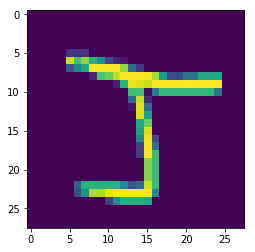

In [71]:
plt.imshow(X_train_rot90[2].reshape(28, 28))

In [77]:
X_train_new = np.concatenate((X_train, X_train_rot90))
y_train_new = np.concatenate((y_train, y_train))

X_train_new.shape

(120000, 784)

In [79]:
forest_mdl = RandomForestClassifier()
forest_crs_score = cross_val_score(forest_mdl, X_train_new, y_train_new, cv=5)
forest_crs_score

/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-package

array([0.91139346, 0.91167403, 0.93016376, 0.91086757, 0.92007001])

Wow! the reduced from 94% to 91%

In [90]:
def rotate_image(oneD_array, width=28, height=28, length=784, rotate=1):
    shape = oneD_array.shape
    size = shape[0] * shape[1]
    new_oneD_array=np.zeros(size).reshape(shape[0], shape[1])    
    for i in range(shape[0]):
        rotate_image = oneD_array[i].reshape(width, height)
        new_oneD_array[i] = np.rot90(rotate_image, rotate).reshape(1, length)
    
    return new_oneD_array

In [94]:
X_train_new = np.concatenate((X_train,
                              rotate_image(X_train, rotate=1), 
                              rotate_image(X_train, rotate=2),
                              rotate_image(X_train, rotate=3)))
y_train_new = np.concatenate((y_train, y_train, y_train, y_train))

X_train_new.shape

(240000, 784)

In [100]:
forest_mdl = RandomForestClassifier()
forest_crs_predict = cross_val_predict(forest_mdl, X_train_new, y_train_new, cv=5)
forest_crs_predict

/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-package

array([5, 0, 3, ..., 5, 6, 3], dtype=int8)

Wow! Thats even lower. Lets compute the confusion matrix

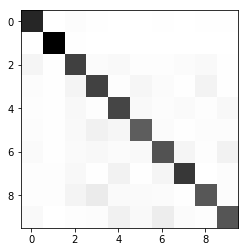

In [101]:
cnf_mat = confusion_matrix(y_train_new, forest_crs_predict)
plt.imshow(cnf_mat,
          cmap='binary')

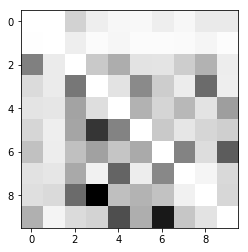

In [102]:
row_sums = cnf_mat.sum(axis=1, keepdims=True)
norm_cnf_mat = cnf_mat/row_sums
np.fill_diagonal(norm_cnf_mat, 0)

plt.imshow(norm_cnf_mat,
          cmap='binary')

Looks like 6 and 9 were getting confused after rotating, similarly 3,4 and 8. This makes sense, so rotation is not a good way to augment the data. Let's try shifting as in the GitHub solutions.

In [104]:
from scipy.ndimage.interpolation import shift

In [109]:
def shift_image(oneD_array, dx, dy, width=28, height=28, length=784):
    shape = oneD_array.shape
    size = shape[0] * shape[1]
    new_oneD_array=np.zeros(size).reshape(shape[0], shape[1])    
    for i in range(shape[0]):
        rotate_image = oneD_array[i].reshape(width, height)
        new_oneD_array[i] = shift(rotate_image, [dx, dy], cval=0, mode='constant').reshape(1, length)
    
    return new_oneD_array

In [115]:
X_train_new = np.concatenate((X_train,
                              shift_image(X_train, 0, 5), 
                              shift_image(X_train, -5, 0)))
y_train_new = np.concatenate((y_train, y_train, y_train))

X_train_new.shape

(180000, 784)

In [116]:
forest_mdl = RandomForestClassifier()
forest_crs_score = cross_val_score(forest_mdl, X_train_new, y_train_new, cv=5)
forest_crs_score

/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/paramasi/.local/lib/python3.6/site-package

array([0.91920342, 0.93575357, 0.91544679, 0.93455192, 0.92357272])

## Titanic dataset

In [3]:
import os
TITANIC_PATH = os.path.join('datasets', 'titanic')

import pandas as pd

def load_titanic(filename, titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [131]:
train = load_titanic('train.csv')
test = load_titanic('test.csv')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

In [80]:
# some feature engineering
def cabin2cat(data):
    data['Cabined'] = 'cabined'
    data['Cabined'][data.Cabin.isnull()] = 'no_cabin'
    return data.drop('Cabin', axis=1)

In [24]:
## Most frequenct cat variable
def catImputeMostFrequent(data):
    most_freq = pd.Series([data[c].value_counts().index[0] for c in data], index=data.columns)
    return data.fillna(most_freq)

In [123]:
## Age buckets
def ageBucket(data):
    data['AgeBucket'] = data['Age'] // 10 * 10
    return data.drop('Age', axis=1)

In [228]:
## Fare buckets
def fareBucket(data):
    data['fareBucket'] = data['Fare'] // 10 * 10
    return data.drop('Fare', axis=1)

In [196]:
## Relatives on board
def relativesOnBoard(data):
    data['relativeOnBoard'] = data['SibSp'] + data['Parch']
    return data

In [229]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Age', 'Pclass', 'Sex', 'Embarked', 'Cabin', 'Fare']

In [230]:
num_pipeline = Pipeline([        
    ('relatives', FunctionTransformer(relativesOnBoard, validate=False)),
    ('impute', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('cabined', FunctionTransformer(cabin2cat, validate=False)),
    ('age_bucket', FunctionTransformer(ageBucket, validate=False)),
    ('fare_bucket', FunctionTransformer(fareBucket, validate=False)),
    ('cat_impute', FunctionTransformer(catImputeMostFrequent, validate=False)),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([    
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [231]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived'].copy()

In [232]:
X_train_prepared = full_pipeline.fit_transform(X_train)

/home/paramasi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [233]:
X_train_prepared.shape

(891, 46)

## training model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [234]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
crs_val_score = cross_val_score(forest_clf, X_train_prepared, y_train, cv=5)
crs_val_score.mean()

0.8048188746171252

In [235]:
from sklearn.model_selection import RandomizedSearchCV

params_grid = {'n_estimators':[80, 90, 100, 110],
              'max_features':[6, 7, 8, 9, 10],
              'min_samples_split':[2, 3, 4, 5],
              'min_samples_leaf':[1, 2, 3, 4, 5]
              }

forest_clf = RandomForestClassifier()
forest_gcv = RandomizedSearchCV(forest_clf, params_grid, cv=5,
                                scoring='accuracy',
                                n_iter=30,
                                return_train_score=True)

forest_gcv.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [236]:
forest_gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
cv_res = forest_gcv.cv_results_

for mean_score, est in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, est)

0.8092031425364759 {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 6}
0.8249158249158249 {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 8}
0.8249158249158249 {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 10}
0.8125701459034792 {'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 8}
0.8181818181818182 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 10}
0.8159371492704826 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 9}
0.819304152637486 {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 9}
0.8260381593714927 {'n_estimators': 110, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 6}
0.8338945005611672 {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 6}
0.8159371492704826 {'n_estimators': 80, 

In [238]:
forest_final_model = forest_gcv.best_estimator_

In [239]:
X_test_prepared = full_pipeline.transform(test)

/home/paramasi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [240]:
y_pred = forest_final_model.predict(X_test_prepared)

In [241]:
test['Survived'] = y_pred

In [242]:
test[['PassengerId', 'Survived']].to_csv("sklearn_randomforest_titanic_submission.csv", index=False)